# Assignment 2: Engineering Predictive Features

**Student Name:** [Your Name Here]

**Date:** [Date]

---

## Assignment Overview

In this assignment, you'll practice feature engineering by creating new predictive features from the Ames Housing dataset. You'll build a baseline model with raw features, engineer at least 5 new features based on real estate intuition, and measure how feature engineering improves model performance.

---

## Step 1: Import Libraries and Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Load the Ames Housing dataset
# TODO: Load train.csv from the data folder
df = pd.read_csv("data/train.csv")  # Replace with pd.read_csv()

# Display basic information
# TODO: Display the first few rows and basic info about the dataset


print("\n" + "="*80)
print("CHECKPOINT: Verify dataset loaded correctly")
print(f"Dataset shape: {df.shape if df is not None else 'Not loaded'}")
print("="*80)


CHECKPOINT: Verify dataset loaded correctly
Dataset shape: (1460, 81)


---
## Step 2: Build Baseline Model with Raw Features

### Select Raw Features for Baseline

Select 10-15 raw features to use in your baseline model. Here's a suggested starting set (you can adjust):

**Suggested features:**
- `GrLivArea` - Above grade living area square feet
- `OverallQual` - Overall material and finish quality
- `YearBuilt` - Original construction year
- `TotalBsmtSF` - Total basement square feet
- `FullBath` - Full bathrooms above grade
- `BedroomAbvGr` - Bedrooms above grade
- `GarageArea` - Size of garage in square feet
- `LotArea` - Lot size in square feet
- `Neighborhood` - Physical location (categorical)
- Add 5-10 more features you think are important

In [3]:
# Select features for baseline model
# TODO: Create a list of feature names you want to use
baseline_features = [
    'GrLivArea',
    'OverallQual',
    'YearBuilt', 
    'TotalBsmtSF',
    'FullBath', 
    'BedroomAbvGr',
    'GarageArea', 
    'LotArea',
    'Neighborhood',
    'BldgType',
    'MSZoning',
    'LotArea',
    'CentralAir',
    'Heating',
    'SaleCondition'
    # Add more features here
]

# TODO: Create X (features) and y (target) for baseline
# Make sure to handle missing values and encode categorical variables
X_baseline = df[baseline_features].copy()  # Replace with your feature matrix
y = df['SalePrice']  # Replace with df['SalePrice']

print(f"Baseline features selected: {len(baseline_features)}")
print(f"Target variable shape: {y.shape if y is not None else 'Not defined'}")

Baseline features selected: 15
Target variable shape: (1460,)


In [4]:
X_baseline.head()

,GrLivArea,OverallQual,YearBuilt,TotalBsmtSF,FullBath,BedroomAbvGr,GarageArea,LotArea,Neighborhood,BldgType,MSZoning,LotArea,CentralAir,Heating,SaleCondition
0,1710,7,2003,856,2,3,548,8450,CollgCr,1Fam,RL,8450,Y,GasA,Normal
1,1262,6,1976,1262,2,3,460,9600,Veenker,1Fam,RL,9600,Y,GasA,Normal
2,1786,7,2001,920,2,3,608,11250,CollgCr,1Fam,RL,11250,Y,GasA,Normal
3,1717,7,1915,756,1,3,642,9550,Crawfor,1Fam,RL,9550,Y,GasA,Abnorml
4,2198,8,2000,1145,2,4,836,14260,NoRidge,1Fam,RL,14260,Y,GasA,Normal


In [5]:
X_baseline.dtypes


GrLivArea         int64
OverallQual       int64
YearBuilt         int64
TotalBsmtSF       int64
FullBath          int64
BedroomAbvGr      int64
GarageArea        int64
LotArea           int64
Neighborhood     object
BldgType         object
MSZoning         object
LotArea           int64
CentralAir       object
Heating          object
SaleCondition    object
dtype: object

### Preprocess Baseline Features

In [6]:
# Handle missing values
# TODO: Fill missing values appropriately
# Numeric: Use median or 0
num_cols = X_baseline.select_dtypes(include=['int64', 'float64']).columns

for x in num_cols:
    med_val = X_baseline[x].median()
    X_baseline[x] =X_baseline[x].fillna(med_val,)

# Categorical: Use 'None' or most frequent

cat_cols = X_baseline.select_dtypes(include=['object']).columns

for x in cat_cols:
    X_baseline[x] = X_baseline[x].fillna('None')


    

# Encode categorical variables
# TODO: Use pd.get_dummies() for categorical features


X_baseline = pd.get_dummies(X_baseline, drop_first=True)


print("\n" + "="*80)
print("CHECKPOINT: After preprocessing")
print(f"X_baseline shape: {X_baseline.shape if X_baseline is not None else 'Not defined'}")
print(f"Missing values: {X_baseline.isnull().sum().sum() if X_baseline is not None else 'N/A'}")
print("="*80)


CHECKPOINT: After preprocessing
X_baseline shape: (1460, 52)
Missing values: 0


In [7]:
X_baseline.head()
X_baseline.dtypes


GrLivArea                int64
OverallQual              int64
YearBuilt                int64
TotalBsmtSF              int64
FullBath                 int64
BedroomAbvGr             int64
GarageArea               int64
LotArea                  int64
LotArea                  int64
Neighborhood_Blueste      bool
Neighborhood_BrDale       bool
Neighborhood_BrkSide      bool
Neighborhood_ClearCr      bool
Neighborhood_CollgCr      bool
Neighborhood_Crawfor      bool
Neighborhood_Edwards      bool
Neighborhood_Gilbert      bool
Neighborhood_IDOTRR       bool
Neighborhood_MeadowV      bool
Neighborhood_Mitchel      bool
Neighborhood_NAmes        bool
Neighborhood_NPkVill      bool
Neighborhood_NWAmes       bool
Neighborhood_NoRidge      bool
Neighborhood_NridgHt      bool
Neighborhood_OldTown      bool
Neighborhood_SWISU        bool
Neighborhood_Sawyer       bool
Neighborhood_SawyerW      bool
Neighborhood_Somerst      bool
Neighborhood_StoneBr      bool
Neighborhood_Timber       bool
Neighbor

In [8]:
X_baseline.head()

,GrLivArea,OverallQual,YearBuilt,TotalBsmtSF,FullBath,BedroomAbvGr,GarageArea,LotArea,LotArea,Neighborhood_Blueste,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1710,7,2003,856,2,3,548,8450,8450,False,...,True,False,False,False,False,False,False,False,True,False
1,1262,6,1976,1262,2,3,460,9600,9600,False,...,True,False,False,False,False,False,False,False,True,False
2,1786,7,2001,920,2,3,608,11250,11250,False,...,True,False,False,False,False,False,False,False,True,False
3,1717,7,1915,756,1,3,642,9550,9550,False,...,True,False,False,False,False,False,False,False,False,False
4,2198,8,2000,1145,2,4,836,14260,14260,False,...,True,False,False,False,False,False,False,False,True,False


### Train Baseline Model

In [9]:
# Split data into train and test sets
# TODO: Use train_test_split with test_size=0.2, random_state=42

X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# Train baseline Random Forest model
# TODO: Create and train RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model =RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model.fit(X_train, y_train)

# Make predictions
# TODO: Generate predictions on test set
baseline_predictions= baseline_model.predict(X_test)

# Calculate metrics
# TODO: Calculate R² and RMSE
baseline_r2 = r2_score(y_test, baseline_predictions)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))

print("\n" + "="*80)
print("BASELINE MODEL RESULTS")
print("="*80)
print(f"R² Score: {baseline_r2 if baseline_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${baseline_rmse:,.2f}" if baseline_rmse is not None else "RMSE: Not calculated")
print("="*80)


BASELINE MODEL RESULTS
R² Score: 0.8963806730050912
RMSE: $28,192.09


### Visualize Baseline Feature Importances

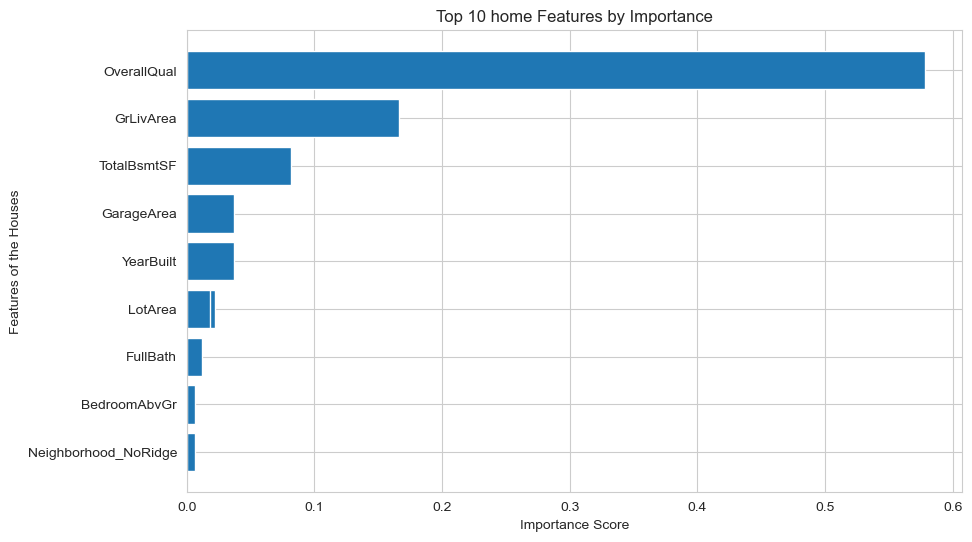


CHECKPOINT: Review which raw features are most important


In [10]:
# Extract and visualize feature importances
# TODO: Get feature importances from baseline_model
# TODO: Create a horizontal bar plot of top 10 features
feature_importances = pd.Series(baseline_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

top_10s = feature_importances.head(10)


plt.barh(top_10s.index, top_10s.values)
plt.xlabel('Importance Score')
plt.ylabel('Features of the Houses')
plt.title('Top 10 home Features by Importance')
plt.gca().invert_yaxis() 
plt.show()

print("\n" + "="*80)
print("CHECKPOINT: Review which raw features are most important")
print("="*80)

---
## Step 3: Engineer New Features

### Feature 1: [Total bathrooms] - [Interaction Feature]

This feature measures the total number of bathrooms in the house by adding the full bath count and half bath count, with each half bath valued at 0.5. This is important for predicting home values because it gives us the overall number of bathrooms in the property.


In [11]:
# TODO: Create your first engineered feature
# Example: df['total_bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']
df['TotalBathrooms'] = df['FullBath'] + (0.5 * df['HalfBath'])+ df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])

### Feature 2: [Time since remodel] - [Derived Metric]

**Business Justification:**
This feature takes the year sold and subtracts the year remodeled, letting us know how long it has been since the house was remodeled. Looking at how long it has been since the last remodel can help predict home price, as it shows how outdated the home is.

In [12]:
# TODO: Create your second engineered feature
df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']


### Feature 3: [quality per sqft] - [Quality-Based Feature]

**Business Justification:**
This feature measures the ratio of overall home quality compared to the total indoor area. It helps predict home prices by looking at the quality of the home's living space, without focusing solely on the house's size.


In [13]:
# TODO: Create your third engineered feature
df['QualityPerSqft'] = df['OverallQual'] / (df['GrLivArea'] + df['TotalBsmtSF'])


### Feature 4: [has fireplce] - [Categorical Combination]

**Business Justification:**
This feature lets us know whether a house has any fireplaces at all. If so, this could signify an increase in home prices, as it could provide a way for homeowners to keep their house warm if there is ever a power outage during winter.

In [14]:
# TODO: Create your fourth engineered featur
df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)



### Feature 5: [Indoor Area] - [Aggregation]

**Business Justification:**

This feature takes the total above ground indoor area and adds it to the total basement area. This is important for predicting house prices because it gives us a single value for the total indoor area, showing the total amount of space available to use within the home.


In [15]:
# TODO: Create your fifth engineered feature
df['IndoorArea'] = df['GrLivArea'] + df['TotalBsmtSF']


### Add More Engineered Features (Optional)

You can create additional features beyond the required 5 if you think they'll improve performance.

In [16]:
# Optional: Create additional engineered features


---
## Step 4: Train Model with Engineered Features

In [20]:
# Create feature list combining baseline + engineered features
# TODO: List all your engineered feature names
engineered_features = [
    'TotalBathrooms',
    'YearsSinceRemodel',
    'HasFireplace',
    'QualityPerSqft',
    'IndoorArea'
]

# Combine baseline and engineered features
all_features = baseline_features + engineered_features

# TODO: Create X_engineered with all features
# Remember to handle missing values and encode categoricals
X_engineered = df[all_features].copy()


eng_num_cols = X_engineered.select_dtypes(include=['int64', 'float64']).columns

for x in eng_num_cols:
    med_val = X_engineered[x].median()
    X_engineered[x] =X_engineered[x].fillna(med_val,)


eng_cat_cols = X_engineered.select_dtypes(include=['object']).columns

X_engineered = pd.get_dummies(X_engineered, drop_first=True)

print(f"Total features in engineered model: {len(all_features)}")
print(f"New engineered features: {len(engineered_features)}")

Total features in engineered model: 20
New engineered features: 5


In [21]:
# Split data (use same random_state for fair comparison)
# TODO: Split X_engineered and y
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_engineered, y, test_size=0.2, random_state=42)

None, None, None, None

# Train model with engineered features
# TODO: Train RandomForestRegressor(n_estimators=100, random_state=42)
engineered_model = RandomForestRegressor(n_estimators=100, random_state=42)
engineered_model.fit(X_train_eng, y_train_eng)

# Make predictions
# TODO: Generate predictions on test set
engineered_predictions = engineered_model.predict(X_test_eng)

# Calculate metrics
# TODO: Calculate R² and RMSE
engineered_r2 = r2_score(y_test_eng, engineered_predictions)
engineered_rmse = np.sqrt(mean_squared_error(y_test_eng, engineered_predictions))

print("\n" + "="*80)
print("ENGINEERED MODEL RESULTS")
print("="*80)
print(f"R² Score: {engineered_r2 if engineered_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${engineered_rmse:,.2f}" if engineered_rmse is not None else "RMSE: Not calculated")
print("="*80)


ENGINEERED MODEL RESULTS
R² Score: 0.8922264051423403
RMSE: $28,751.67


---
## Step 5: Compare Models and Identify Most Valuable Features

### Create Comparison Table

In [22]:
# Create comparison DataFrame
# TODO: Create a table comparing baseline vs engineered model
comparison = pd.DataFrame({
    'Model': ['Baseline', 'Engineered'],
    'R² Score': [baseline_r2, engineered_r2],
    'RMSE': [baseline_rmse, engineered_rmse]
})  

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
# TODO: Display comparison table

print("MODEL COMPARISON:")
print(comparison.to_string(index=False))

print("="*80)

# Calculate improvement
if baseline_r2 is not None and engineered_r2 is not None:
    r2_improvement = ((engineered_r2 - baseline_r2) / baseline_r2) * 100
    rmse_improvement = ((baseline_rmse - engineered_rmse) / baseline_rmse) * 100
    print(f"\nR² Improvement: {r2_improvement:.2f}%")
    print(f"RMSE Improvement: {rmse_improvement:.2f}%")


MODEL COMPARISON
MODEL COMPARISON:
     Model  R² Score         RMSE
  Baseline  0.896381 28192.091789
Engineered  0.892226 28751.671761

R² Improvement: -0.46%
RMSE Improvement: -1.98%


### Visualize Feature Importances from Engineered Model

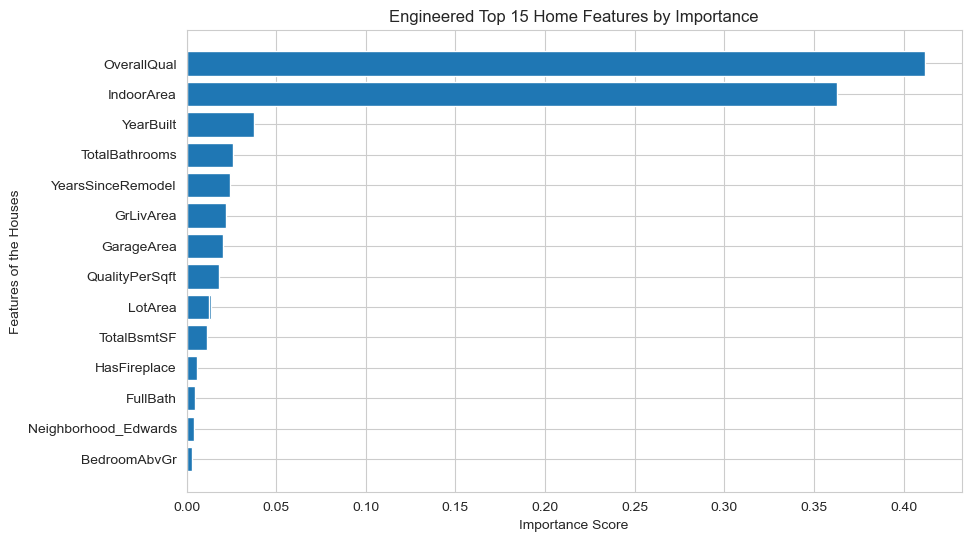

In [24]:
# Extract and visualize top 15 feature importances
# TODO: Get feature importances from engineered_model
# TODO: Create horizontal bar plot of top 15 features
eng_feature_importances = pd.Series(engineered_model.feature_importances_, index=X_train_eng.columns).sort_values(ascending=False)

eng_top_15s = eng_feature_importances.head(15)

    
plt.barh(eng_top_15s.index, eng_top_15s.values)
plt.xlabel('Importance Score')
plt.ylabel('Features of the Houses')
plt.title('Engineered Top 15 Home Features by Importance')
plt.gca().invert_yaxis() 
plt.show()


### Analysis: Most Valuable Features

**Write 3-5 bullet points analyzing your results:**

- All of the newly added engineered futures showed up in the top 15 
    - Including in this order: Indoor area, Total bathrooms, years since remodel, quality per square feet,  has a fireplace
    
- I think all of these features performed well because they are often what homebuyers look for when buying a new home.

- A new feature that I would add is one that measures the ratio between the number of bedrooms and the number of bathrooms


---
## Step 6: Submit Your Work

Before submitting:
1. Make sure all code cells run without errors
2. Verify you have at least 5 engineered features with business justifications
3. Check that your comparison table and visualizations display correctly
4. Complete the analysis section above

Then push to GitHub:
```bash
git add .
git commit -m 'completed feature engineering assignment'
git push
```

Submit your GitHub repository link on the course platform.